In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline
from scipy import stats

In [2]:
from sklearn.datasets import load_linnerud

In [3]:
data = load_linnerud().data
target = load_linnerud().target
feature_names = load_linnerud().feature_names
target_names = load_linnerud().target_names

In [4]:
df1 = pd.DataFrame(data, columns = feature_names)
df2 = pd.DataFrame(target, columns = target_names)

In [5]:
df1.head()

,Chins,Situps,Jumps
0,5.0,162.0,60.0
1,2.0,110.0,60.0
2,12.0,101.0,101.0
3,12.0,105.0,37.0
4,13.0,155.0,58.0


In [6]:
df2.head()

,Weight,Waist,Pulse
0,191.0,36.0,50.0
1,189.0,37.0,52.0
2,193.0,38.0,58.0
3,162.0,35.0,62.0
4,189.0,35.0,46.0


In [7]:
main = pd.merge(df1,df2,left_index = True, right_index = True)
main.head()

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0


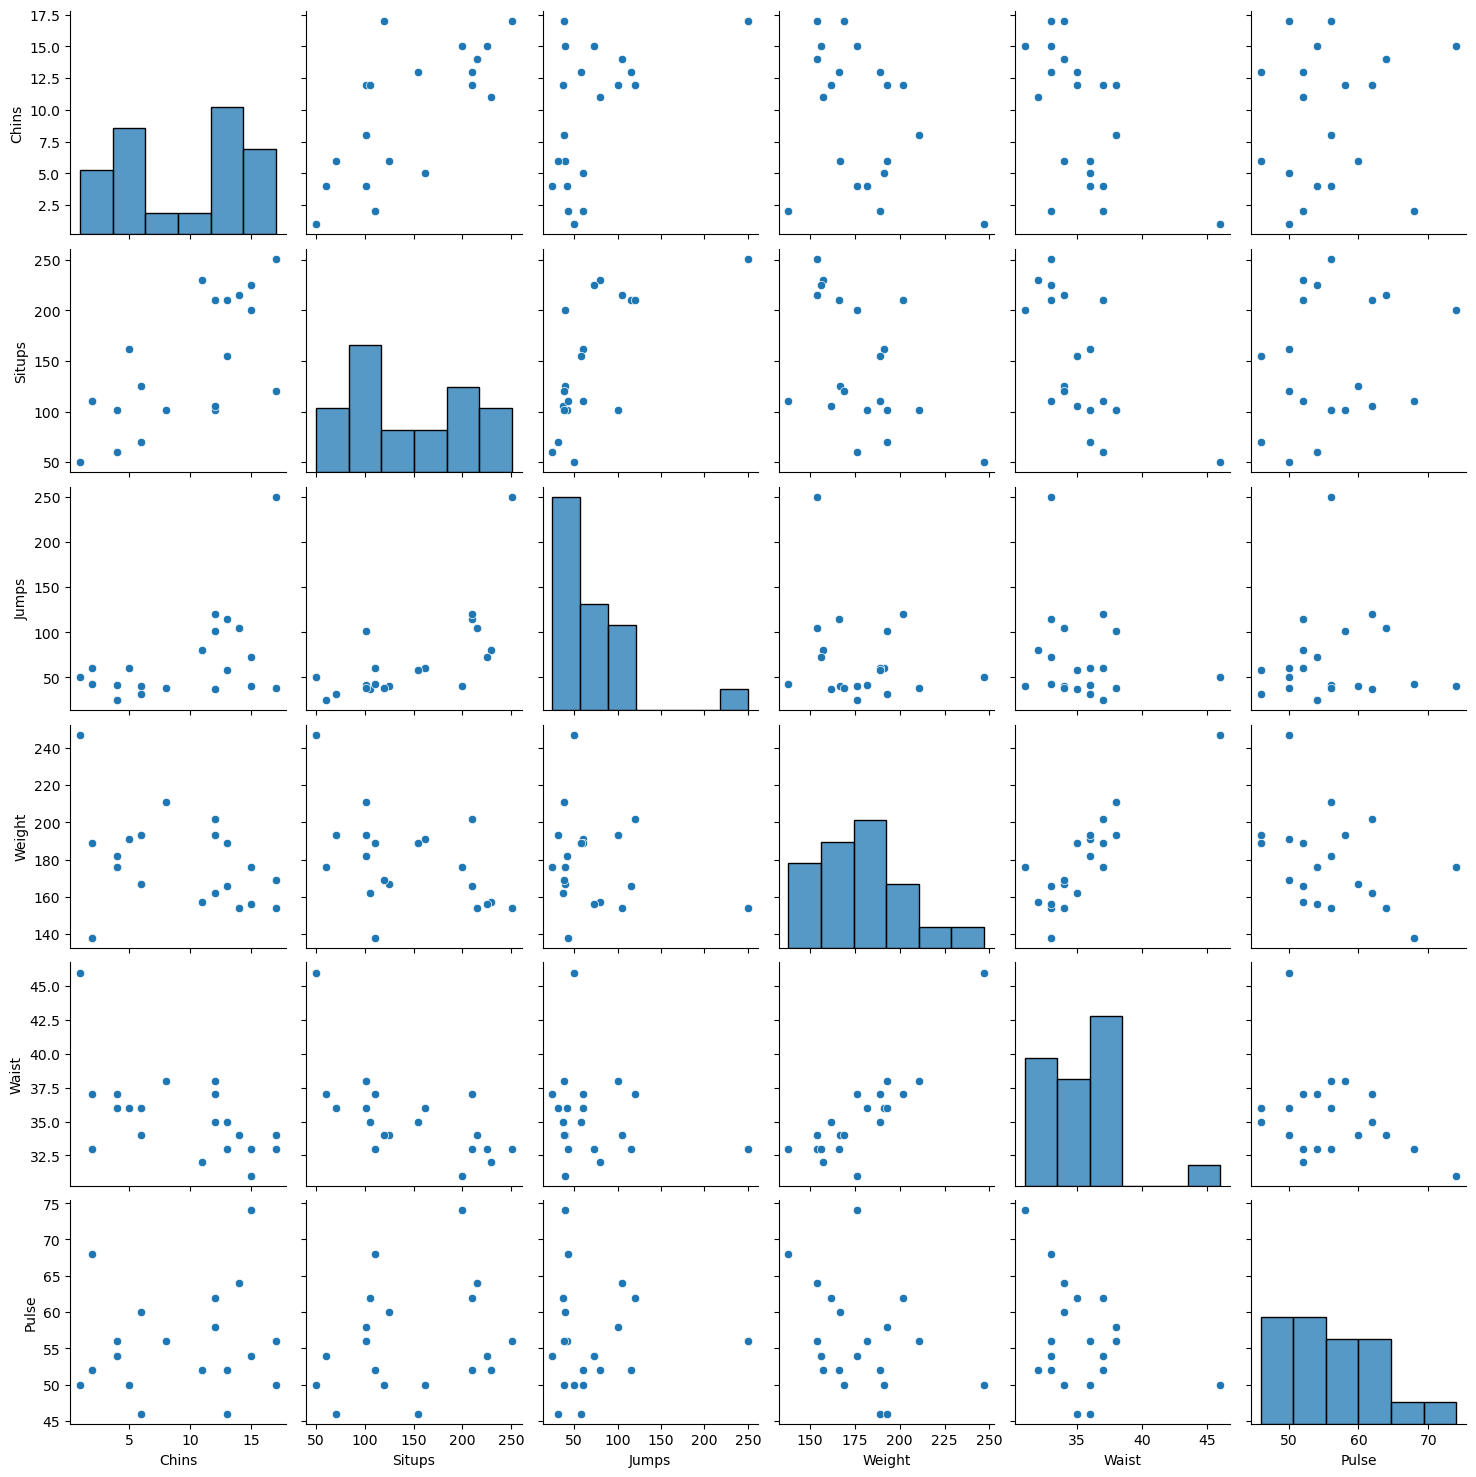

In [8]:
sns.pairplot(main)

<AxesSubplot:>

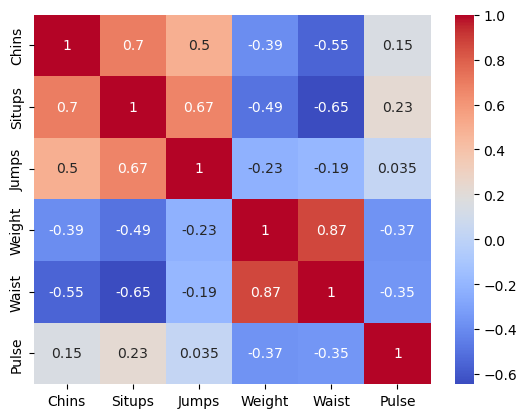

In [9]:
correlation_df = main.corr()
sns.heatmap(correlation_df, cmap = "coolwarm", annot = True)

In [10]:
for col in main.columns:
    main[col], _ = stats.boxcox(main[col])
print(main)

        Chins     Situps     Jumps    Weight     Waist     Pulse
0    3.256703  20.117480  1.488591  0.821873  0.227926  0.574863
1    0.923824  16.507468  1.488591  0.821855  0.227926  0.574905
2    7.782527  15.793620  1.523996  0.821891  0.227926  0.575009
3    7.782527  16.114987  1.443786  0.821564  0.227926  0.575063
4    8.374971  19.672639  1.485867  0.821855  0.227926  0.574763
5    2.524185  15.793620  1.456858  0.821789  0.227926  0.574978
6    5.296525  15.793620  1.446622  0.822032  0.227926  0.574978
7    3.959254  17.629844  1.451947  0.821626  0.227926  0.575037
8    9.532517  22.367415  1.451947  0.821727  0.227926  0.575180
9   10.658405  25.047360  1.563979  0.821456  0.227926  0.574978
10  10.658405  17.264293  1.446622  0.821650  0.227926  0.574863
11   8.374971  22.919912  1.531184  0.821614  0.227926  0.574905
12   8.958032  23.190796  1.526207  0.821456  0.227926  0.575087
13   0.000000  10.860355  1.473244  0.822248  0.227926  0.574863
14   3.959254  13.024751 

In [11]:
X = main[["Chins","Situps","Jumps"]]
y = main["Weight"]

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 1)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((16, 3), (4, 3), (16,), (4,))

In [13]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [14]:
y_predict = model.predict(X_test)
print("Coefficients: ",model.coef_)

Coefficients:  [ 2.17163212e-05 -5.62724394e-05  1.65519892e-03]


In [15]:
mse = mean_squared_error(y_test,y_predict, squared = True)
print("Mean Square Errored:", mse)

Mean Square Errored: 5.089126267133782e-08


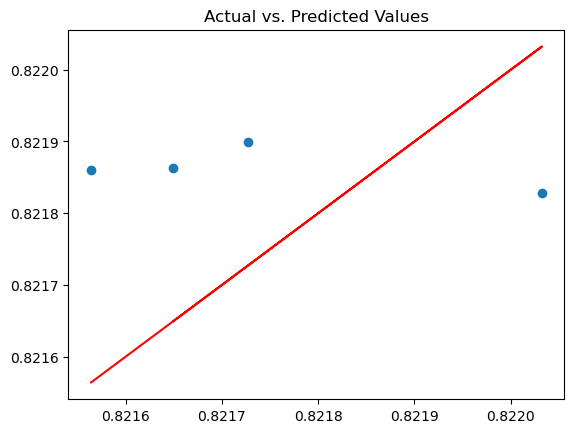

In [16]:
plt.scatter(y_test, y_predict)
plt.plot(y_test, y_test, color='red')
plt.title('Actual vs. Predicted Values')
plt.show()

In [17]:
X2 = main["Weight"].values.reshape(-1,1)
y2 = main["Waist"]
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size = 0.20,random_state = 1)
X2_train.shape,X2_test.shape,y2_train.shape,y2_test.shape

((16, 1), (4, 1), (16,), (4,))

In [18]:
model2 = LinearRegression()
model2.fit(X2_train,y2_train)

LinearRegression()

In [19]:
y2_predict = model2.predict(X2_test)
print("Coefficients: ",model.coef_)

Coefficients:  [ 2.17163212e-05 -5.62724394e-05  1.65519892e-03]


In [20]:
mse2 = mean_squared_error(y2_test,y2_predict, squared = True)
print("Mean Square Errored:", mse2)

Mean Square Errored: 4.020745915506577e-17


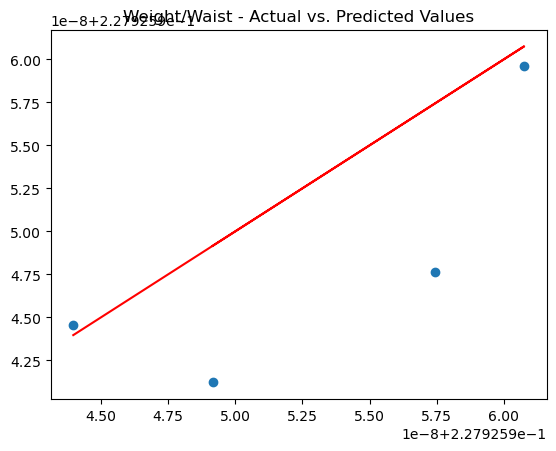

In [23]:
plt.scatter(y2_test, y2_predict)
plt.plot(y2_test, y2_test, color='red')
plt.title('Weight/Waist - Actual vs. Predicted Values')
plt.show()

In [36]:
import pickle
models = {"model":model,"model2":model2}
with open("models.pkl","wb") as file:
    pickle.dump(models,file)
    

In [42]:
with open("models.pkl","rb") as file:
     models = pickle.load(file)
print(models["model"].predict([[0.923824,16.507468,1.488591]]))

[0.82176299]


C:\Users\yashw\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [48]:
print(models["model2"].predict([[0.821873]]))

[0.22792595]
